In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [3]:
titanic_df = pd.read_csv('train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

TypeError: 'NoneType' object is not iterable

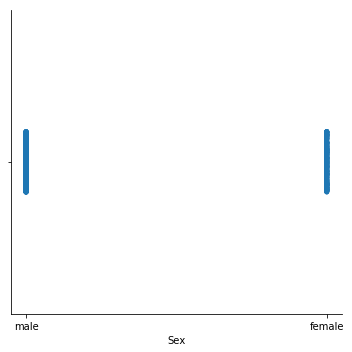

In [10]:
sns.catplot('Sex', data = titanic_df, hue = 'Pclass')

In [11]:
def male_female_child(passenger):
    age,sex = passenger
    if age<16:
        return 'child'
    else:
        return sex

In [12]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis =1)

In [13]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


TypeError: 'NoneType' object is not iterable

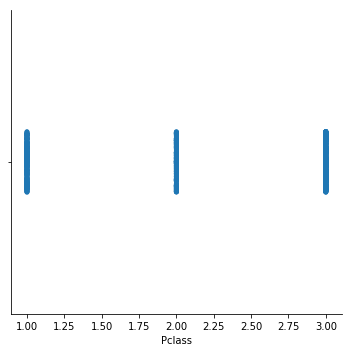

In [14]:
sns.catplot('Pclass',data=titanic_df, hue = 'person')

In [15]:
titanic_df['Age'].mean()

29.69911764705882

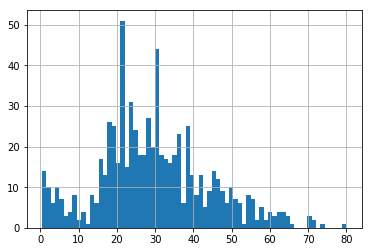

In [16]:
titanic_df['Age'].hist(bins = 70)

In [17]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


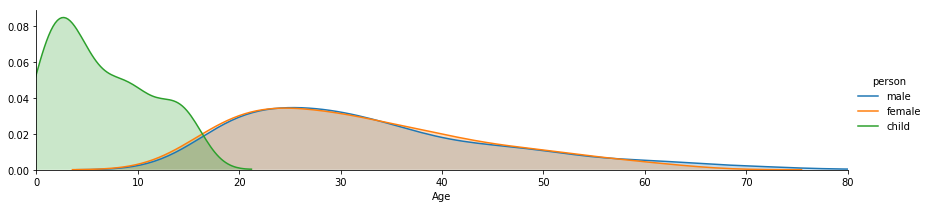

In [18]:
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 4)
fig.map(sns.kdeplot,'Age',shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

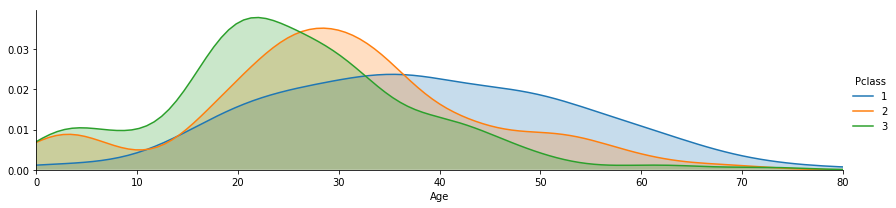

In [19]:
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot,'Age',shade = True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [20]:
 titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [21]:
deck = titanic_df['Cabin'].dropna()

In [22]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

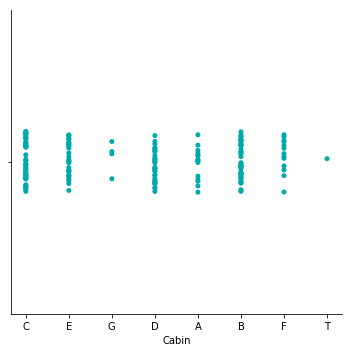

In [29]:
levels = []

for level in deck:
    levels.append(level[0])
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin', data=cabin_df, palette = 'winter_d')

In [32]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [34]:
cabin_df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [36]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

In [37]:
cabin_df.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: Cabin, dtype: int64

In [ ]:
sns.catplot('Embarked', data = titanic_df, hue = 'Pclass', x_order=['C','Q','S'])

In [40]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [42]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [43]:
titanic_df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
5            Alone
6            Alone
7      With Family
8      With Family
9      With Family
10     With Family
11           Alone
12           Alone
13     With Family
14           Alone
15           Alone
16     With Family
17           Alone
18     With Family
19           Alone
20           Alone
21           Alone
22           Alone
23           Alone
24     With Family
25     With Family
26           Alone
27     With Family
28           Alone
29           Alone
          ...     
861    With Family
862          Alone
863    With Family
864          Alone
865          Alone
866    With Family
867          Alone
868          Alone
869    With Family
870          Alone
871    With Family
872          Alone
873          Alone
874    With Family
875          Alone
876          Alone
877          Alone
878          Alone
879    With Family
880    With Family
881          Alone
882         

In [44]:
titanic_df['Alone'].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

In [45]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [47]:
titanic_df['Survivor']= titanic_df.Survived.map({0:'no',1:'yes'})

In [48]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


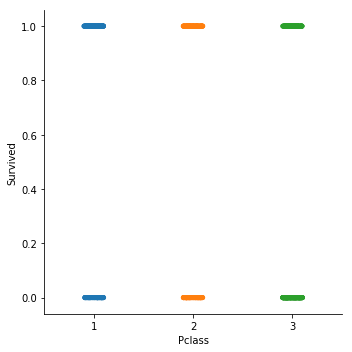

In [49]:
sns.catplot('Pclass','Survived', data = titanic_df)

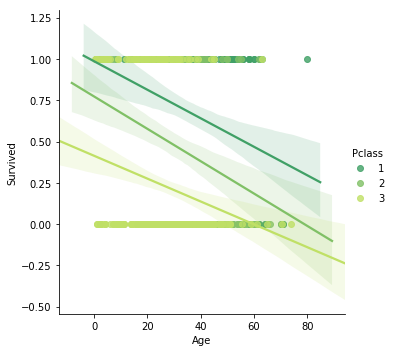

In [51]:
sns.lmplot('Age','Survived',data=titanic_df, hue = 'Pclass', palette = 'summer')

In [52]:
generations = [10,20,30,40,50,60,80]

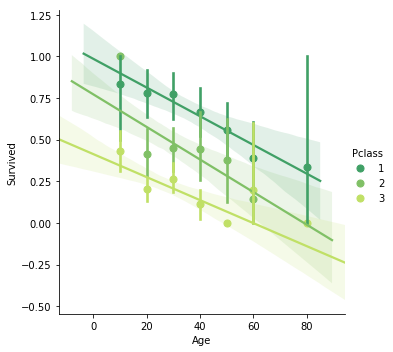

In [53]:
sns.lmplot('Age','Survived',data=titanic_df, hue = 'Pclass', palette = 'summer',x_bins = generations)

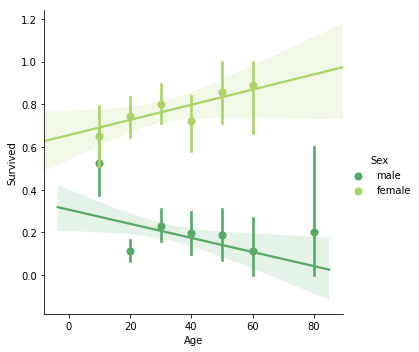

In [54]:
sns.lmplot('Age','Survived',data=titanic_df, hue = 'Sex', palette = 'summer',x_bins = generations)

In [55]:
#did deck have an impact on the survival rate also with sex
#did having a family increase the chance of survival

In [56]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [57]:
titanic_df['Deck']=cabin_df['Cabin']

In [58]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,C


In [59]:
deck=titanic_df[titanic_df['Survived']==1]

In [60]:
deck.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes,B
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes,D


In [115]:
deck['Deck'].value_counts()

B    17
C    16
E    12
D     9
A     8
F     5
G     1
Name: Deck, dtype: int64

In [117]:
A=deck['Deck'].value_counts()

In [116]:
titanic_df['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: Deck, dtype: int64

In [118]:
B=titanic_df['Deck'].value_counts()

In [114]:
A/B

A    0.533333
B    0.361702
C    0.271186
D    0.272727
E    0.375000
F    0.384615
G    0.250000
Name: Deck, dtype: float64

In [100]:
deck1 = deck.groupby(['Deck','Sex']).sum()

In [109]:
deck1['Survived']

Deck  Sex   
A     female     5
      male       3
B     female    15
      male       2
C     female    10
      male       6
D     female     9
E     female     7
      male       5
F     female     4
      male       1
G     female     1
Name: Survived, dtype: int64

In [120]:
titanic_df.groupby('Alone').sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Alone,,,,,,,
Alone,245946,163,1289,13017.00,0,0,11407.3238
With Family,151440,179,768,8188.17,466,340,17286.6255
